<a href="https://colab.research.google.com/github/Raphael-Blaize/K-NN-CLASSIFIER-AND-NAIVE-BAYES-/blob/main/NAIVE_BAYES_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAIVE BAYES CLASSIFIER SOLUTIONS

## 1. Defining the Question

### a) Specifying the Question


> During this week’s Independent project, you will get to test the skills that you learned this week. More specifically, you will get the test your understanding of the following learning outcomes.

> Overall Learning Outcomes

>> I can understand and apply supervised learning algorithms such as regression, decision trees, KNN, SVM, naive Bayes, random forests to solving business problems.

>> I can understand the benefits, limitations, and requirements of various supervised learning algorithms.



### b) Defining the Metric for Success


> Able to use find the optimal k-nn parameters to increase the accuracy of my model

> No multicollinearity in the dataset in-order to acchive accurate results 

> Ensuring that the data has been preproccesed well this includes:

        1. Taking care of Outliers
        2. Taking care of missing values 
        3. Taking care of column names 
        4. Taking care of special character if there is any

> Ensuring that my dataset has also been encoded properly before applying it to the model for training 

### d) Recording the Experimental Design

> We will be conducting an EDA Analysis of the data in -order to understand the relationship in the variables by:

         1. Univariate analysis
         2. Bivarate analysis 
         3. Multi-variate analysis where needed

> We will also see the correlation between the variables using: 

         1. Heatmap to see the correlation
         2. Pearsons correlation 
         3. Chi squared where possible 

**Modelling approach**
         
        1. Naive Bayes Classifier:
> Randomly partition each dataset into two parts i.e 80 - 20, 70-30, 60-40  sets, then perform Naive Bayes classification.

> Compute the accuracy (percentage of correct classification).

> Report the confusion matrix of the classifier in each different set.

> Suggest and apply at least one of the optimization techniques.

> Provide further recommendations to improve the classifier.

## **DATASETS USED IN THIS ANALYSIS**

The Datset files used in this analysis are found from the link below

Link : [Dataset](https://archive.ics.uci.edu/ml/datasets/Spambase)









## **DATASETS DESCRIPTION**

**Data Set Information:**

> The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

> Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

> For background on spam:

Cranor, Lorrie F., LaMacchia, Brian A. Spam!
Communications of the ACM, 41(8):74-83, 1998.

          1. (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.

          2. (b) Determine whether a given email is spam or not.

          3. (c) ~7% misclassification error. False positives (marking good mail as spam) are very undesirable.If we insist on zero false positives in the training/testing set, 20-25% of the spam passed through the filter.



**Attribute Information:**

> The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

> 48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

> 6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

> 1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

> 1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

> 1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

> 1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.



## **DATA SECTION**

### **IMPORTING THE LIBRARIES WE NEED AND LOOKING THROUGH OUR DATASET TO UNDERSTAND IT BETTER**

In [44]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# getting the dataset 
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

--2021-06-15 15:33:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 702942 (686K) [application/x-httpd-php]
Saving to: ‘spambase.data.1’

spambase.data.1     100%[===================>] 686.47K  2.60MB/s    in 0.3s    

2021-06-15 15:33:36 (2.60 MB/s) - ‘spambase.data.1’ saved [702942/702942]



In [45]:
#getting the .names file 
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

--2021-06-15 15:33:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3566 (3.5K) [application/x-httpd-php]
Saving to: ‘spambase.names.1’

spambase.names.1    100%[===================>]   3.48K  --.-KB/s    in 0s      

2021-06-15 15:33:36 (80.6 MB/s) - ‘spambase.names.1’ saved [3566/3566]



In [46]:
# Looking through the .names file
with open("spambase.names") as f:
    print(f.read())

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [47]:
df = pd.read_csv('spambase.data', names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet','word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people','word_freq_report' ,'word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct',
                                           'word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam'])
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


##### DATASET PREPROCESSING SECTION

In [48]:
# checking the info on our ranking dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [49]:
#cheking the shape of our data 
df.shape

(4601, 58)

In [50]:
#cheking for null values 
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [51]:
#cheking the percentage of null values in our columns
percent_miss = df.isnull().sum() * 100 / len(df)

#Putting the percentage into a dataframe
missing_dataframe = pd.DataFrame({'percent_missing': percent_miss})
missing_dataframe

,percent_missing
word_freq_make,0.0
word_freq_address,0.0
word_freq_all,0.0
word_freq_3d,0.0
word_freq_our,0.0
word_freq_over,0.0
word_freq_remove,0.0
word_freq_internet,0.0
word_freq_order,0.0
word_freq_mail,0.0


**Analysis of the missing values**
      
> From the above dataframe we can see that our dataset contains no null values


In [52]:
#cheking for duplicates in the dataset 
df.duplicated().sum()

391

There are a no duplicated values in the dataset

In [53]:
#cheking the unique values in the column names 

#for loop to iterate through each column
for column in df.columns:
  # creating a variable columnc which will be the the content in each column
  columnc = df[column]
  #Printing the column name
  print("Column Name:", column)
  # printing the number of unique values in the column
  print(columnc.nunique())
  print("\n")

Column Name: word_freq_make
142


Column Name: word_freq_address
171


Column Name: word_freq_all
214


Column Name: word_freq_3d
43


Column Name: word_freq_our
255


Column Name: word_freq_over
141


Column Name: word_freq_remove
173


Column Name: word_freq_internet
170


Column Name: word_freq_order
144


Column Name: word_freq_mail
245


Column Name: word_freq_receive
113


Column Name: word_freq_will
316


Column Name: word_freq_people
158


Column Name: word_freq_report
133


Column Name: word_freq_addresses
118


Column Name: word_freq_free
253


Column Name: word_freq_business
197


Column Name: word_freq_email
229


Column Name: word_freq_you
575


Column Name: word_freq_credit
148


Column Name: word_freq_your
401


Column Name: word_freq_font
99


Column Name: word_freq_000
164


Column Name: word_freq_money
143


Column Name: word_freq_hp
395


Column Name: word_freq_hpl
281


Column Name: word_freq_george
240


Column Name: word_freq_650
200


Column Name: word_freq_lab
1

In [54]:
#cheking column types
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [55]:
#Cheking for outliers

# dealing with the outliers using quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df1.shape)

# Printing the shape of our old dataset
print(df.shape)

(177, 58)
(4601, 58)


> Since i cannot plot a boxplot to see the number of outliers in our dataset i used the quantile method to see the shape of my dataset after the outliers were droppped

> I will use my orginal dataset because the shape after dropping the outliers was greatly reduced, and will not help when forming anytype of analysis 

### EDA ANALYSIS

#### **PERFORMING UNIVARIATE ANALYSIS** 

In [56]:
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

####  Numerical variables

######  a) Measures of central tendancy

In [57]:
#Mean
for column in df:
  # Selecting column contents by column name using [] operator
       columncontent = df[column]
       print('Colunm Name', column)
       print('Column mean:', columncontent.mean())
       print()

Colunm Name word_freq_make
Column mean: 0.10455335796565962

Colunm Name word_freq_address
Column mean: 0.21301456205172783

Colunm Name word_freq_all
Column mean: 0.2806563790480323

Colunm Name word_freq_3d
Column mean: 0.06542490762877635

Colunm Name word_freq_our
Column mean: 0.3122234296891974

Colunm Name word_freq_over
Column mean: 0.09590089111062813

Colunm Name word_freq_remove
Column mean: 0.11420778091719185

Colunm Name word_freq_internet
Column mean: 0.10529450119539223

Colunm Name word_freq_order
Column mean: 0.0900673766572484

Colunm Name word_freq_mail
Column mean: 0.23941317104977197

Colunm Name word_freq_receive
Column mean: 0.05982395131493154

Colunm Name word_freq_will
Column mean: 0.5417018039556623

Colunm Name word_freq_people
Column mean: 0.09392958052597254

Colunm Name word_freq_report
Column mean: 0.058626385568354686

Colunm Name word_freq_addresses
Column mean: 0.04920452075635739

Colunm Name word_freq_free
Column mean: 0.24884807650510785

Colunm Na

In [58]:
# median
for column in df:
  columncontent = df[column]
  print("Column Name", column)
  print("Column Median", columncontent.median())
  print()

Column Name word_freq_make
Column Median 0.0

Column Name word_freq_address
Column Median 0.0

Column Name word_freq_all
Column Median 0.0

Column Name word_freq_3d
Column Median 0.0

Column Name word_freq_our
Column Median 0.0

Column Name word_freq_over
Column Median 0.0

Column Name word_freq_remove
Column Median 0.0

Column Name word_freq_internet
Column Median 0.0

Column Name word_freq_order
Column Median 0.0

Column Name word_freq_mail
Column Median 0.0

Column Name word_freq_receive
Column Median 0.0

Column Name word_freq_will
Column Median 0.1

Column Name word_freq_people
Column Median 0.0

Column Name word_freq_report
Column Median 0.0

Column Name word_freq_addresses
Column Median 0.0

Column Name word_freq_free
Column Median 0.0

Column Name word_freq_business
Column Median 0.0

Column Name word_freq_email
Column Median 0.0

Column Name word_freq_you
Column Median 1.31

Column Name word_freq_credit
Column Median 0.0

Column Name word_freq_your
Column Median 0.22

Column N

In [59]:
# variance
for column in df:
  columncontent = df[column]
  print("Column Name", column)
  print("Column Variance:", columncontent.var())
  print()

Column Name word_freq_make
Column Variance: 0.0932432406849213

Column Name word_freq_address
Column Variance: 1.6655843234836658

Column Name word_freq_all
Column Variance: 0.25416004733374625

Column Name word_freq_3d
Column Variance: 1.946447346587822

Column Name word_freq_our
Column Variance: 0.45227342485092964

Column Name word_freq_over
Column Variance: 0.0749796284361655

Column Name word_freq_remove
Column Variance: 0.1532263342089777

Column Name word_freq_internet
Column Variance: 0.1608583099892943

Column Name word_freq_order
Column Variance: 0.07762679980723562

Column Name word_freq_mail
Column Variance: 0.4157095251221632

Column Name word_freq_receive
Column Variance: 0.04062025160881839

Column Name word_freq_will
Column Variance: 0.7425242554076359

Column Name word_freq_people
Column Variance: 0.09062255504002746

Column Name word_freq_report
Column Variance: 0.11234819972974051

Column Name word_freq_addresses
Column Variance: 0.06699993229261043

Column Name word

In [60]:
#cheking for skewnwess in my columns
# also cheking if the columns is postiviley or negative;y skewed
# defining a custom function called my_skew to check the skewness of each column

def my_skew():
  #iterating through each column name 
  for column in df:
    columncontent = df[column]#setting the column content to be the column name after each iteration
    skew = columncontent.skew() #Getting the skewness of column content
    if skew > 0 :
      print("Positively skewed") 
    elif skew == 0 :
      print("Symmetric distribution")
    else:
      print("negatively skewed")

    print("Column Name", column, "....")
    print("Column skewness:", skew)
    print("\n")

#calling the function
print(my_skew())

Positively skewed
Column Name word_freq_make ....
Column skewness: 5.675639163765851


Positively skewed
Column Name word_freq_address ....
Column skewness: 10.086810872543571


Positively skewed
Column Name word_freq_all ....
Column skewness: 3.0092485272970904


Positively skewed
Column Name word_freq_3d ....
Column skewness: 26.227744470347666


Positively skewed
Column Name word_freq_our ....
Column skewness: 4.747126114133084


Positively skewed
Column Name word_freq_over ....
Column skewness: 5.956952736312442


Positively skewed
Column Name word_freq_remove ....
Column skewness: 6.7655804692611206


Positively skewed
Column Name word_freq_internet ....
Column skewness: 9.724847529977309


Positively skewed
Column Name word_freq_order ....
Column skewness: 5.226066951054146


Positively skewed
Column Name word_freq_mail ....
Column skewness: 8.487809520414334


Positively skewed
Column Name word_freq_receive ....
Column skewness: 5.510250153233095


Positively skewed
Column Name 

In [61]:
#Getting the Kurtosis of the columns
def kurt():
  for column in df:
    columncontent = df[column]
    kurt = columncontent.kurt()
    if kurt > 3:
      print('It is leptokurtic distribution')
    elif kurt < 3:
      print('It is platykurtic distribution')
    else:
      print('It is mesokurtic distribution') 
    print("Column Name :", column)
    print("Kutorsis Value:", kurt)
    print("\n")
 
print(kurt())

It is leptokurtic distribution
Column Name : word_freq_make
Kutorsis Value: 49.30506415870118


It is leptokurtic distribution
Column Name : word_freq_address
Kutorsis Value: 105.64747160937861


It is leptokurtic distribution
Column Name : word_freq_all
Kutorsis Value: 13.308743418467486


It is leptokurtic distribution
Column Name : word_freq_3d
Kutorsis Value: 726.4515380990603


It is leptokurtic distribution
Column Name : word_freq_our
Kutorsis Value: 37.94116889421045


It is leptokurtic distribution
Column Name : word_freq_over
Kutorsis Value: 68.44525800064235


It is leptokurtic distribution
Column Name : word_freq_remove
Kutorsis Value: 75.41343865108215


It is leptokurtic distribution
Column Name : word_freq_internet
Kutorsis Value: 169.16287621284124


It is leptokurtic distribution
Column Name : word_freq_order
Kutorsis Value: 46.94025552319656


It is leptokurtic distribution
Column Name : word_freq_mail
Kutorsis Value: 161.21464053175148


It is leptokurtic distribution

In [62]:
#describing my dataset
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

##### Distributions 

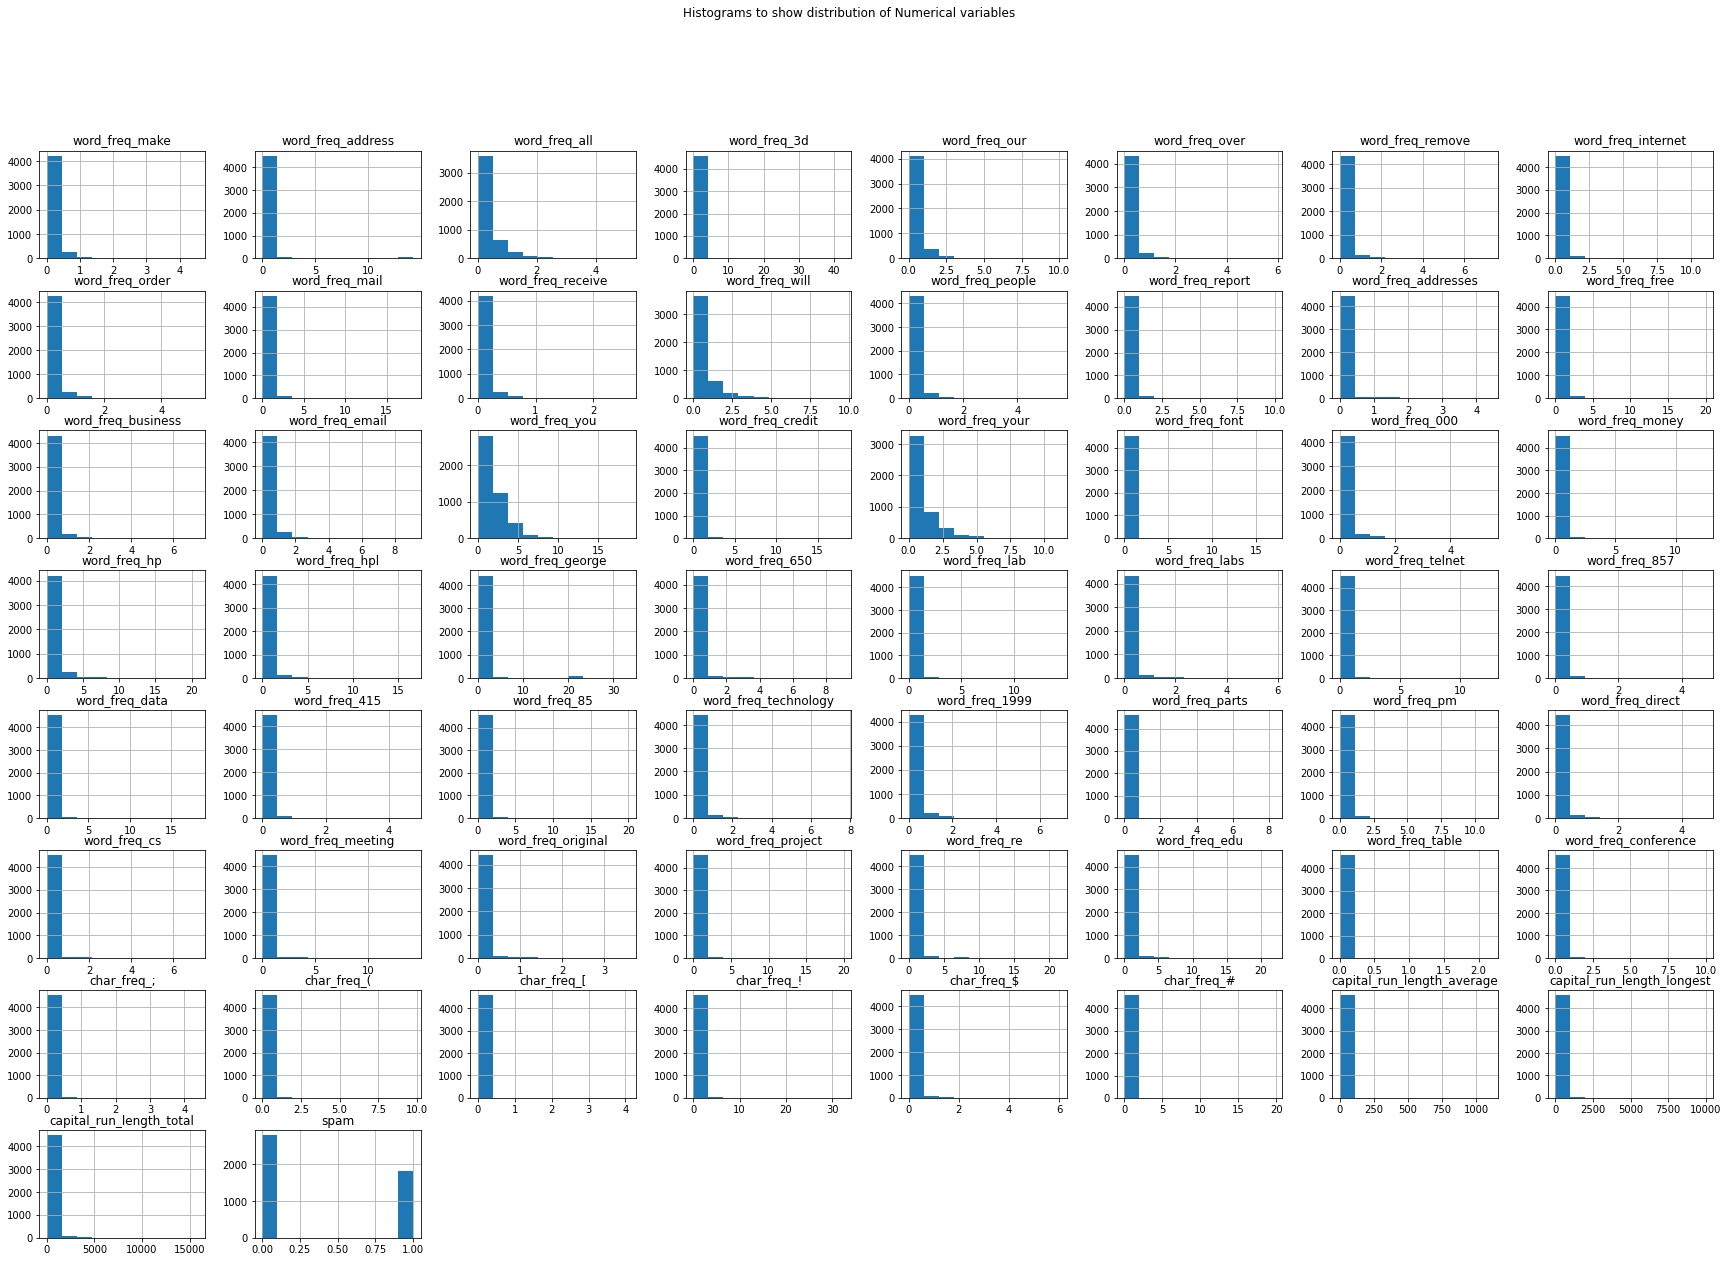

In [63]:
df.hist(bins=10, figsize=(30,20))
plt.suptitle('Histograms to show distribution of Numerical variables')
plt.show()

Due to the datasets large number of features visualising some of the analysis is going to be difficult so i will stop at univariate and continue on to implementing the solution

## IMPLEMENTING THE SOLUTION

#### NAIVE BAYES CLASSIFIER

In [64]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


##### CHECKING FOR MULTICOLLINEARITY IN OUR DATASET 

Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. For example, let’s assume that in the following linear equation:

Y = W0+W1*X1+W2*X2

Coefficient W1 is the increase in Y for a unit increase in X1 while keeping X2 constant. But since X1 and X2 are highly correlated, changes in X1 would also cause changes in X2 and we would not be able to see their individual effect on Y.

Inaccurate use of dummy variables can also cause a multicollinearity problem. This is called the Dummy variable trap:



In [65]:
# VIF (Variable Inflation Factors)
# VIF score of an independent variable represents how well the variable is explained by other independent variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [66]:
df1 = df.iloc[:, :-1]
calc_vif(df1)

,variables,VIF
0,word_freq_make,1.264152
1,word_freq_address,1.017979
2,word_freq_all,1.413556
3,word_freq_3d,1.007463
4,word_freq_our,1.329527
5,word_freq_over,1.218429
6,word_freq_remove,1.207568
7,word_freq_internet,1.163680
8,word_freq_order,1.326399
9,word_freq_mail,1.231711


> From the above VIF dataframe we can see that 

         Column               VIF
      1. word_freq_857        135.309047
      2. word_freq_415        131.987960

> Are the two columns with the highest VIF score so i will drop them 

In [67]:
df1.drop(columns = ['word_freq_857', 'word_freq_415'], inplace=True)
df1

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_data,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


##### FEATURE REDUCTION TECHNIQUE TO FIND THE BEST FEATURES TO USE 

In [68]:
# using LDA to get the coeeficients and the variables that affect my target column the most 

feat = df1
income_label = df['spam']

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Create an instance of LDA
lda = LDA()
lda_= lda.fit(feat,income_label)
lda_feat=lda_.transform(feat)
# Display the coeficients of the reducted columns
lda_.coef_

array([[-4.62535730e-01, -1.11150954e-01,  3.71456993e-01,
         1.13762610e-01,  8.05431630e-01,  1.13835456e+00,
         2.02868265e+00,  8.91298236e-01,  6.96519696e-01,
         1.41486749e-01,  5.48036345e-01, -2.71172743e-01,
         1.15998422e-01,  4.56275289e-02,  1.65271435e-01,
         7.15135108e-01,  4.81369435e-01,  5.09428339e-01,
         1.36763412e-01,  5.86699633e-01,  5.03155721e-01,
         4.27331874e-01,  1.66148226e+00,  8.65123437e-01,
        -2.19924573e-01, -2.01068129e-01, -1.14351461e-01,
         4.20797922e-02, -3.68224908e-02, -4.55114696e-01,
        -1.58826195e-01, -3.99452404e-01, -2.81862941e-01,
         3.20831979e-01, -3.21248029e-01, -5.01702844e-01,
        -1.87435158e-01,  6.33036104e-01, -8.29307136e-02,
        -3.60803772e-01, -5.77899703e-01, -3.08662022e-01,
        -3.31998440e-01, -3.57509478e-01, -1.85019009e+00,
        -5.53373477e-01, -1.32791146e+00, -5.25462940e-01,
        -5.63353344e-01,  6.48842617e-01,  2.21565357e+0

In [69]:
# Since the coefficients are in an array, we needto create a dataframe so that we can extract the name of the columns
f_imp = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
char_freq_$,2.215654
word_freq_remove,2.028683
word_freq_000,1.661482
word_freq_over,1.138355
word_freq_internet,0.891298
word_freq_money,0.865123
word_freq_our,0.805432
word_freq_free,0.715135
word_freq_order,0.696520
char_freq_!,0.648843


From the above LDA we can pick the first 10 varibales because they seem to to have the highest coefficients, this means that those variables affect my target varibale the most compared to other varibales

##### MODELLING

I will use BernoulliNB classifier because the value we are tryting to predicts is binary with 1 or 0 so Bernoulli may perform better compared to the other classifiers

######  **80 : 20 split Naive bayes**:

In [84]:
# matrix of fetaures x and dv
x = df1[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over', 'word_freq_internet', 'word_freq_free', 'word_freq_our', 'word_freq_direct', 'word_freq_money']]
y = df['spam']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Training the Naive bayes models  on the Training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(x_train, y_train)

#predicting a new result
y_pred = classifier.predict(x_test)

#getting the accuracy of the model
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
# Printing out the accuracy
print("The f1 score is:", f1_score(y_test, y_pred))
print("The f1_Beta score is:", fbeta_score(y_test, y_pred, beta = 0.5))  

0.8642779587404995
The f1 score is: 0.8201438848920862
The f1_Beta score is: 0.8736971183323116


######  **70 : 30 split Naive bayes**:

In [85]:
# matrix of fetaures x and dv
x = df1[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over', 'word_freq_internet', 'word_freq_free', 'word_freq_our', 'word_freq_direct', 'word_freq_money']]
y = df['spam']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Training the Naive bayes models  on the Training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(x_train, y_train)

#predicting a new result
y_pred = classifier.predict(x_test)

#getting the accuracy of the model
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
# Printing out the accuracy
print("The f1 score is:", f1_score(y_test, y_pred))
print("The f1_Beta score is:", fbeta_score(y_test, y_pred, beta = 0.5))  

0.8616944243301955
The f1 score is: 0.8091908091908091
The f1_Beta score is: 0.8702191663085518


######  **60 : 40 split Naive bayes**:

In [87]:
# matrix of fetaures x and dv
x = df1[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over', 'word_freq_internet', 'word_freq_free', 'word_freq_our', 'word_freq_direct', 'word_freq_money']]
y = df['spam']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Training the Naive bayes models  on the Training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(x_train, y_train)

#predicting a new result
y_pred = classifier.predict(x_test)

#getting the accuracy of the model
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
# Printing out the accuracy
print("The f1 score is:", f1_score(y_test, y_pred))
print("The f1_Beta score is:", fbeta_score(y_test, y_pred, beta = 0.5))  

0.8685497012493211
The f1 score is: 0.819672131147541
The f1_Beta score is: 0.8769132653061225


In the above split we can see that a split of 60-40 works best with Bernoulli comapred to the pther split

##### CHALLENGING THE SOLUTION

######  **80 : 20 split Naive bayes**:

In [78]:
# matrix of fetaures x and dv
x = df1[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over', 'word_freq_internet', 'word_freq_free', 'word_freq_our', 'word_freq_direct', 'word_freq_money']]
y = df['spam']

from sklearn import naive_bayes 
from sklearn.model_selection import train_test_split

Gaussian = naive_bayes.GaussianNB()
Multi = naive_bayes.MultinomialNB()
Bern = naive_bayes.BernoulliNB()

classifier = [Gaussian, Multi, Bern]

# model names 
classifier_name = ['Gaussian', 'Multinomial', 'Bernoulli']

for model, name in zip(classifier, classifier_name):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

  # Feature Scaling
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  # transform data
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  #Training the Naive bayes models  on the Training set
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  #getting the accuracy of the model
  from sklearn.metrics import accuracy_score, classification_report
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)

  from sklearn.metrics import f1_score
  from sklearn.metrics import fbeta_score
  # Printing out the accuracy
  print("The accuracy score for", name, "is", accuracy)
  print("The f1 score is:", f1_score(y_test, y_pred))
  print("The f1_Beta score is:", fbeta_score(y_test, y_pred, beta = 0.5))  
  print("\n") 
  print("CLASSIFICATION REPORT OF", name)
  print(classification_report(y_test, y_pred))
  print("\n") 

The accuracy score for Gaussian is 0.8045602605863192
The f1 score is: 0.7305389221556886
The f1_Beta score is: 0.8010505581089954


CLASSIFICATION REPORT OF Gaussian
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       538
           1       0.86      0.64      0.73       383

    accuracy                           0.80       921
   macro avg       0.82      0.78      0.79       921
weighted avg       0.81      0.80      0.80       921



The accuracy score for Multinomial is 0.6091205211726385
The f1 score is: 0.11764705882352938
The f1_Beta score is: 0.2484472049689441


CLASSIFICATION REPORT OF Multinomial
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       538
           1       0.96      0.06      0.12       383

    accuracy                           0.61       921
   macro avg       0.78      0.53      0.43       921
weighted avg       0.75      0.61      0.49       921



T

######  **70: 30 split Naive bayes**:

In [79]:
# matrix of fetaures x and dv
x = df1[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over', 'word_freq_internet', 'word_freq_free', 'word_freq_our', 'word_freq_direct', 'word_freq_money']]
y = df['spam']

from sklearn import naive_bayes 
from sklearn.model_selection import train_test_split

Gaussian = naive_bayes.GaussianNB()
Multi = naive_bayes.MultinomialNB()
Bern = naive_bayes.BernoulliNB()

classifier = [Gaussian, Multi, Bern]

# model names 
classifier_name = ['Gaussian', 'Multinomial', 'Bernoulli']

for model, name in zip(classifier, classifier_name):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

  # Feature Scaling
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  # transform data
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  #Training the Naive bayes models  on the Training set
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  #getting the accuracy of the model
  from sklearn.metrics import accuracy_score, classification_report
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)

  from sklearn.metrics import f1_score
  from sklearn.metrics import fbeta_score
  # Printing out the accuracy
  print("The accuracy score for", name, "is", accuracy)
  print("The f1 score is:", f1_score(y_test, y_pred))
  print("The f1_Beta is:", fbeta_score(y_test, y_pred, beta = 0.5))  
  print("\n") 
  print("CLASSIFICATION REPORT OF", name)
  print(classification_report(y_test, y_pred))
  print("\n") 

The accuracy score for Gaussian is 0.8131788559015206
The f1 score is: 0.732919254658385
The f1_Beta is: 0.8093278463648833


CLASSIFICATION REPORT OF Gaussian
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       822
           1       0.87      0.63      0.73       559

    accuracy                           0.81      1381
   macro avg       0.83      0.78      0.79      1381
weighted avg       0.82      0.81      0.81      1381



The accuracy score for Multinomial is 0.6401158580738595
The f1 score is: 0.2073365231259968
The f1_Beta is: 0.39109506618531886


CLASSIFICATION REPORT OF Multinomial
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       822
           1       0.96      0.12      0.21       559

    accuracy                           0.64      1381
   macro avg       0.79      0.56      0.49      1381
weighted avg       0.76      0.64      0.54      1381



The accuracy s

######  **60:40 split Naive bayes**:

In [80]:
# matrix of fetaures x and dv
x = df1[['char_freq_$', 'word_freq_remove', 'word_freq_000', 'word_freq_receive', 'word_freq_over', 'word_freq_internet', 'word_freq_free', 'word_freq_our', 'word_freq_direct', 'word_freq_money']]
y = df['spam']

from sklearn import naive_bayes 
from sklearn.model_selection import train_test_split

Gaussian = naive_bayes.GaussianNB()
Multi = naive_bayes.MultinomialNB()
Bern = naive_bayes.BernoulliNB()

classifier = [Gaussian, Multi, Bern]

# model names 
classifier_name = ['Gaussian', 'Multinomial', 'Bernoulli']

for model, name in zip(classifier, classifier_name):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)

  # Feature Scaling
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  # transform data
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  #Training the Naive bayes models  on the Training set
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  #getting the accuracy of the model
  from sklearn.metrics import accuracy_score, classification_report
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)

  from sklearn.metrics import f1_score
  from sklearn.metrics import fbeta_score
  # Printing out the accuracy
  print("The accuracy score for", name, "is", accuracy)
  print("The f1 score is:", f1_score(y_test, y_pred))
  print("The f1_Beta is:", fbeta_score(y_test, y_pred, beta = 0.5))  
  print("\n") 
  print("CLASSIFICATION REPORT OF", name)
  print(classification_report(y_test, y_pred))
  print("\n") 

The accuracy score for Gaussian is 0.8207495926127105
The f1 score is: 0.7417840375586854
The f1_Beta is: 0.8229166666666667


CLASSIFICATION REPORT OF Gaussian
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1097
           1       0.89      0.64      0.74       744

    accuracy                           0.82      1841
   macro avg       0.84      0.79      0.80      1841
weighted avg       0.83      0.82      0.81      1841



The accuracy score for Multinomial is 0.6414991852254209
The f1 score is: 0.21052631578947367
The f1_Beta is: 0.39568345323741005


CLASSIFICATION REPORT OF Multinomial
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      1097
           1       0.96      0.12      0.21       744

    accuracy                           0.64      1841
   macro avg       0.79      0.56      0.49      1841
weighted avg       0.76      0.64      0.54      1841



The accuracy

##### **CONCLUSIONS**

 

---



---




**80-20 Split**

> GaussianNB

     1. Accuracy - 82.8%%
     2. F1_score - 76%
     3. F1_Beta score - 83.1%


> MultinomialNB
      
      1. Accuracy - 61.9%
      2. F1_score - 14%
      3. F1_Beta score - 30%
       
> BernoulliNB

     1. Accuracy - 82%
     2. F1_score - 77 %
     3. F1_Beta score - 80%



---

---


**70-30 Split**

> GaussianNB

     1. Accuracy - 84.1%
     2. F1_score - 78.9%
     3. F1_Beta score - 84.4%


> MultinomialNB
      
      1. Accuracy - 61.9%
      2. F1_score - 16%
      3. F1_Beta score - 33.3%
       
> BernoulliNB

     1. Accuracy - 83.6%
     2. F1_score - 79.1%
     3. F1_Beta score - 82.41%



---


---



**60-40 Split**

> GaussianNB

     1. Accuracy - 84.4%
     2. F1_score - 78.9%
     3. F1_Beta score - 84.4%


> MultinomialNB
      
      1. Accuracy - 62.7%
      2. F1_score - 17.8%
      3. F1_Beta score - 34.6%
       
> BernoulliNB

     1. Accuracy - 83.90%
     2. F1_score - 79.0%
     3. F1_Beta score - 82.3%



> From the above conclusion we can see that 70-30 split performed the best in GaussianNB comapred to the other splits 

> 80-20 split had the highest accuracy in MultinomiaNB at 62% compared to the other splits 

> The 70-30 split also performed the best in BernoulliNB compared to the other splits 

> Recommendation is to use the 70-30 split as it is the most optimal split because it performs the best in two classifiers

> MulitnomialNB should also not be used as it does not do well with this dataset 